In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Задание 1

Пусть X - случайная величина с равномерным распределение на $[0, 1]$. Рассмотрим 3 модели


(a) монотонная зависимость: $Y = \sin(\frac{\pi X}{2})$;


(b) монотонная зависимость с маленьким шумом: $Y = \sin(\frac{\pi X}{2})+ \epsilon$, где $\epsilon$ имеет нормальное распределение с нулевым средним и дисперсией $\sigma^2 = 0.04$;


(c) немонотонная зависимость с маленьким шумом: Y = sin(πX)+ ε.
Целью задач, перечисленных ниже, является изучение возможностей коэффициентов корреляции "поймать" разные виды зависимости.

$(i)$ Просимулируйте выборку $(X_1, Y_1), ...(X_n, Y_n)$ для каждой модели M раз (например, $n = 1000$ и $M = 20$). По каждой выборке вычислите коэффициенты корреляции Пирсона, Кендалла и Спирмена и соотвествующие уровни значимости. Если для каких-то моделей и методов получаются существенно различные уровни значимости для разных выборок, отобразите эти уровни на диаграмме размаха.

In [61]:
def generate_sample_x(n = 1000, M = 20):
  """
  Simulate uniform sample

  """

  x = np.random.uniform(low=0.0, high=1.0, size=(n, M))
  return x

In [62]:
n = 1000
M = 20

In [63]:
x = generate_sample_x()
x.shape

(1000, 20)

**посмотрим на график для трех различных моделей**

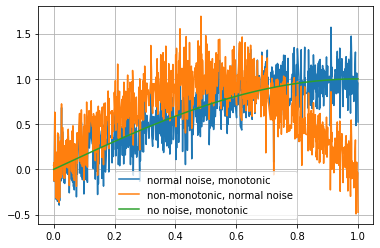

In [64]:
x_1 = np.sort(x[:, 2])
eps = np.random.normal(loc = 0, scale = np.sqrt(0.04), size = 1000)
y_a = np.sin(np.pi * x_1 / 2)
y_b = np.sin(np.pi * x_1 / 2) + eps
y_c = np.sin(np.pi * x_1) + eps
fig, ax = plt.subplots()
ax.plot(x_1, y_b, label = 'normal noise, monotonic')
ax.plot(x_1, y_c, label = 'non-monotonic, normal noise')
ax.plot(x_1, y_a, label = 'no noise, monotonic')
leg = ax.legend()
ax.grid(True)

In [65]:
eps = np.random.normal(loc = 0, scale = np.sqrt(0.04), size = (n, M))
y_a = np.sin(np.pi * x / 2)
y_b = np.sin(np.pi * x / 2) + eps
y_c = np.sin(np.pi * x) + eps

**Коэффициент Пирсона**

In [66]:
pearson_a = [stats.pearsonr(x[:, i], y_a[:, i]) for i in range(20)]
pearson_a

[(0.9787831477088786, 0.0),
 (0.9780479720231254, 0.0),
 (0.9791366481189012, 0.0),
 (0.9799449989990937, 0.0),
 (0.9792186741745704, 0.0),
 (0.9799841718469569, 0.0),
 (0.979285122118326, 0.0),
 (0.9794697466046797, 0.0),
 (0.9794186956507233, 0.0),
 (0.9781279736864804, 0.0),
 (0.9782893269294236, 0.0),
 (0.9789574952469162, 0.0),
 (0.9781803726018801, 0.0),
 (0.9789147926859791, 0.0),
 (0.9784301409570503, 0.0),
 (0.9799864462647355, 0.0),
 (0.9783186680649286, 0.0),
 (0.9793234925248863, 0.0),
 (0.9785833177314189, 0.0),
 (0.9780469142364955, 0.0)]

In [67]:
pearson_b = [stats.pearsonr(x[:, i], y_b[:, i]) for i in range(20)]
pearson_b

[(0.8206843749705555, 7.951087046209901e-245),
 (0.8437297307593294, 6.355110085331849e-272),
 (0.8095159006906186, 4.644698986926214e-233),
 (0.8251992077881392, 8.099987849082748e-250),
 (0.8249787943659252, 1.4305991061855585e-249),
 (0.8387102801353846, 1.1650566430487677e-265),
 (0.8218920107142091, 3.7936121747579334e-246),
 (0.8332132683730649, 4.8215798607042603e-259),
 (0.8178612216789585, 8.932661542084356e-242),
 (0.8338868893527325, 7.681051333787851e-260),
 (0.8230275678122699, 2.125073700221698e-247),
 (0.8297153711883364, 5.875885412566049e-255),
 (0.8090652915685461, 1.3343701405429234e-232),
 (0.8093906334869223, 6.230039676427929e-233),
 (0.8033538862655318, 6.768906284283986e-227),
 (0.8225991746338825, 6.318679480954358e-247),
 (0.8144934933027091, 3.321428779514764e-238),
 (0.8369121459267125, 1.810892198412786e-263),
 (0.8209664264202214, 3.914749015263827e-245),
 (0.8101378727073285, 1.077280376012305e-233)]

In [68]:
pearson_c = [stats.pearsonr(x[:, i], y_c[:, i]) for i in range(20)]
pearson_c

[(-0.012743821205608697, 0.6873107010076934),
 (0.026486396359367118, 0.40277662161233835),
 (0.006117727214125583, 0.8467871730560925),
 (0.042565772380257286, 0.1786336385331043),
 (-0.013226430441024197, 0.6761287367167782),
 (0.057015600725392634, 0.07151351662042578),
 (0.01727338577236175, 0.5853478412386814),
 (0.05771637836917612, 0.06809308208261769),
 (0.0436152859624461, 0.16815165776289498),
 (-0.0022915783063014055, 0.9423030586250956),
 (-0.0042581215148176895, 0.8930184223135236),
 (0.0020973331328182276, 0.947186259377518),
 (-0.00463935759714122, 0.8835056413636936),
 (-0.03708145381462346, 0.24137582795943494),
 (-0.043068425889647974, 0.1735543765716952),
 (0.021866548853994493, 0.48975489213870743),
 (0.00039919809251388313, 0.9899405668275848),
 (0.07157846614231023, 0.02359978862932846),
 (0.02789932488684833, 0.37814344371623226),
 (-0.06805889071399783, 0.031396180217489154)]

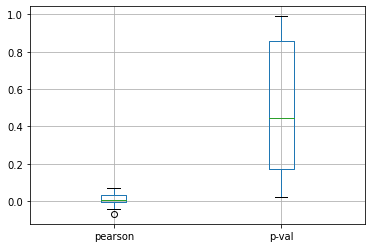

In [69]:
pearson_c = [stats.pearsonr(x[:, i], y_c[:, i]) for i in range(20)]
pearson_c = pd.DataFrame(pearson_c, columns =['pearson', 'p-val']) 
pearson_c.boxplot(column= ['pearson', 'p-val'])

**Коэффициент Кендалла**

In [70]:
kendall_a = [(stats.kendalltau(x[:, i], y_a[:, i], method = 'exact')[0],
              stats.kendalltau(x[:, i], y_a[:, i], method = 'exact')[1]) for i in range(20)]
kendall_a 

[(1.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0)]

In [71]:
kendall_b = [(stats.kendalltau(x[:, i], y_b[:, i], method = 'auto')[0],
              stats.kendalltau(x[:, i], y_b[:, i], method = 'auto')[1]) for i in range(20)]
kendall_b

[(0.6281041041041041, 2.231025700122533e-194),
 (0.6534134134134134, 3.466627659673006e-210),
 (0.611915915915916, 1.358940584745675e-184),
 (0.6312312312312313, 2.685265522249344e-196),
 (0.6294294294294295, 3.436722665979212e-195),
 (0.6427227227227227, 1.9655821380129455e-203),
 (0.6298898898898899, 1.7926878557091766e-195),
 (0.6414214214214214, 1.282233000717001e-202),
 (0.624892892892893, 2.04049926344926e-192),
 (0.6379099099099099, 1.984170598576576e-200),
 (0.6238238238238238, 9.129350416688802e-192),
 (0.6307627627627628, 5.21377033350991e-196),
 (0.6118638638638638, 1.4596590283794874e-184),
 (0.6128408408408409, 3.8107421029664076e-185),
 (0.6047367367367368, 2.4601446540094024e-180),
 (0.6230270270270271, 2.7841848564455748e-191),
 (0.6073753753753753, 6.79028199086377e-182),
 (0.6462822822822823, 1.1407003969447507e-205),
 (0.6206286286286287, 7.917949360057307e-190),
 (0.6081481481481482, 2.365937763486616e-182)]

In [72]:
kendall_c = [(stats.kendalltau(x[:, i], y_c[:, i], method = 'auto')[0],
              stats.kendalltau(x[:, i], y_c[:, i], method = 'auto')[1]) for i in range(20)]
kendall_c

[(0.02132932932932933, 0.3125090631541697),
 (0.008676676676676678, 0.6811811846371606),
 (-0.0049249249249249255, 0.8156049046462285),
 (0.04102102102102102, 0.05208890686898824),
 (-0.002286286286286286, 0.913790558526156),
 (0.03968368368368368, 0.060234443853385146),
 (0.02595795795795796, 0.21901827503911186),
 (0.045897897897897895, 0.029755890676231765),
 (0.0456936936936937, 0.030490811810448742),
 (-0.030206206206206208, 0.15263012536538606),
 (-0.029177177177177178, 0.16710162937211026),
 (-0.010686686686686687, 0.6128367145305109),
 (0.0007127127127127127, 0.9730782090243668),
 (-0.02633033033033033, 0.21247997299625887),
 (-0.03992792792792793, 0.058672566001386636),
 (0.014626626626626626, 0.48856711677688114),
 (-0.0013693693693693693, 0.9483002737795454),
 (0.046066066066066065, 0.029162147994308777),
 (0.0062022022022022024, 0.7690007010788769),
 (-0.04677877877877878, 0.026757627487484077)]

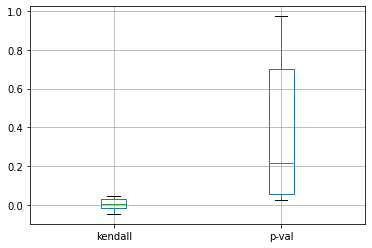

In [73]:
kendall_c = [(stats.kendalltau(x[:, i], y_c[:, i], method = 'auto')[0],
              stats.kendalltau(x[:, i], y_c[:, i], method = 'auto')[1]) for i in range(20)]
kendall_c = pd.DataFrame(kendall_c, columns =['kendall', 'p-val'])
kendall_c.boxplot(column= ['kendall', 'p-val'])

**Коэффициент Спирмена**

In [74]:
spearman_a = [(stats.spearmanr(x[:, i], y_a[:, i])[0],
              stats.spearmanr(x[:, i], y_a[:, i])[1]) for i in range(20)]
spearman_a 

[(1.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0),
 (1.0, 0.0)]

In [75]:
spearman_b = [(stats.spearmanr(x[:, i], y_b[:, i])[0],
              stats.spearmanr(x[:, i], y_b[:, i])[1]) for i in range(20)]
spearman_b

[(0.8308319788319788, 2.9851817729852086e-256),
 (0.8531103371103372, 3.037123148365931e-284),
 (0.813991077991078, 1.116137808679924e-237),
 (0.8373438333438333, 5.422515818846764e-264),
 (0.8323692883692884, 4.760882275696953e-258),
 (0.8451614571614573, 9.461592510670354e-274),
 (0.8319531759531761, 1.4654417072706987e-257),
 (0.8400187560187562, 2.8481602235455466e-267),
 (0.8266127386127387, 2.0698254780121834e-251),
 (0.8385084585084586, 2.0590462590783515e-265),
 (0.8238154998154998, 2.8417283631046285e-248),
 (0.8293393213393214, 1.5950637833436608e-254),
 (0.8168194808194807, 1.1568159153983597e-240),
 (0.8162899682899684, 4.225853858118694e-240),
 (0.8057355977355979, 2.9818419964226093e-229),
 (0.8264065664065665, 3.540925043212051e-251),
 (0.8111313311313312, 1.0322169351186233e-234),
 (0.8453177333177335, 5.962143529344654e-274),
 (0.8221013581013582, 2.2334161563424357e-246),
 (0.807806691806692, 2.505897700109152e-231)]

In [76]:
spearman_c = [(stats.spearmanr(x[:, i], y_c[:, i])[0],
              stats.spearmanr(x[:, i], y_c[:, i])[1]) for i in range(20)]
spearman_c       

[(0.024789744789744793, 0.43359162517971217),
 (0.018967566967566966, 0.5490989749000775),
 (0.0033169713169713174, 0.9165655041294457),
 (0.06016663216663217, 0.05717382532479805),
 (-0.008975840975840976, 0.7767999286621183),
 (0.05922143922143923, 0.06120006232507116),
 (0.04034862434862435, 0.2023592035943035),
 (0.06294156294156295, 0.046605169384427526),
 (0.06545002145002146, 0.038514018927539515),
 (-0.030345150345150347, 0.33775097889051986),
 (-0.03205883605883607, 0.31116440973419507),
 (-0.016209844209844212, 0.6086560478536183),
 (0.0005999645999646, 0.9848819346812012),
 (-0.034047682047682055, 0.2820849434347283),
 (-0.045705345705345714, 0.14866106622449354),
 (0.02355845955845956, 0.45678245758193536),
 (-0.0031276831276831284, 0.9213109136891783),
 (0.07194283194283195, 0.02289781625744534),
 (0.005760365760365761, 0.8556357463352386),
 (-0.07037554637554638, 0.02605128117177749)]

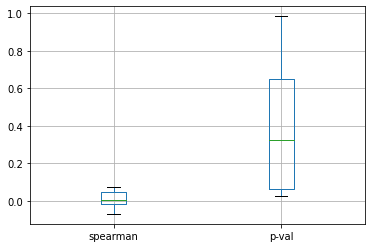

In [77]:
spearman_c = [(stats.spearmanr(x[:, i], y_c[:, i])[0],
              stats.spearmanr(x[:, i], y_c[:, i])[1]) for i in range(20)]
spearman_c = pd.DataFrame(spearman_c, columns =['spearman', 'p-val'])
spearman_c.boxplot(column= ['spearman', 'p-val'])

**(ii)** В модели (b), увеличите дисперсию шума - рассмотрите σ2 = 0.5, 1, 1.5, 2, ... Для каждого σ2, вычислите коэффициенты кор- реляции Кендалла. Найдите наибольшее значение σ2, при ко- тором коэффициенты являются значимыми.


In [78]:
variances = np.arange(start = 0.5, stop = 20, step = 0.5)
iters = variances.shape[0]
iters

39

In [79]:
x = np.random.uniform(low=0.0, high=1.0, size=n)

In [80]:
y = np.zeros(shape = (1000, 1))
for i in range(iters):
  eps = np.random.normal(loc = 0, scale = np.sqrt(variances[i]), size = n)
  y_new = np.sin(np.pi * x / 2) + eps
  y_new = y_new.reshape(1000,1)
  y = np.append(y, y_new, axis = 1)
y = y[:, 1:]
y.shape

(1000, 39)

In [81]:
kendall_array = [(stats.kendalltau(x, y[:, i], method = 'auto')[0],
              stats.kendalltau(x, y[:, i], method = 'auto')[1]) for i in range(iters)]
kendall_df = pd.DataFrame(kendall_array, columns =['kendall', 'p-val'])
kendall_df['variance'] = variances
kendall_df[kendall_df['p-val'] > 0.05]

,kendall,p-val,variance
23,0.020517,0.331308,12.0
27,0.020757,0.325677,14.0
28,0.025986,0.218521,14.5
29,0.025510,0.227083,15.0
33,0.031483,0.136018,17.0
36,0.003868,0.854681,18.5


**Таким образом, начиная с дисперсии 10 коэффициент становится незначимым**

# **Задача 4**

Сравнить количество цифр 0, 1, 2, .., 9 с ожидаемыми количе- ствами этих цифр в предположении равномерности распределения;

In [82]:
seq = [0,1,7,9,8,4,3,6,6,6,8,9,0,1,7,9,4]
seq_df = pd.DataFrame(data = {'numbers':seq})
grouped = seq_df.groupby('numbers').agg(count = ('numbers', 'count')).reset_index()
grouped.loc[-1] = [2,0]
grouped['expected'] = 1/10 * grouped['count'].sum()
grouped = grouped.sort_values(by = 'numbers')
grouped.reset_index(drop = True)

,numbers,count,expected
0,0,2,1.7
1,1,2,1.7
2,2,0,1.7
3,3,1,1.7
4,4,2,1.7
5,6,3,1.7
6,7,2,1.7
7,8,2,1.7
8,9,3,1.7


In [83]:
def return_chi_test(observed_col, expected_col, df):
  chi_obs = ((df[observed_col]-df[expected_col])**2 / df[expected_col]).sum()
  degf = df.shape[0] - 1
  p_value = 1 - stats.chi2.cdf(chi_obs, degf)
  print(chi_obs, p_value)

In [84]:
return_chi_test('count', 'expected', grouped)

4.241176470588234 0.8347344044431734


Гипотеза о соответствии равномерному распределению не отвергается


**(ii) сравнить выпадение такой же цифры / соседней цифры / другой цифры с ожидаемыми количествами таких выпадений (0 и 9 при этом удобно считать соседними).**

Всего было два случая выпадения такой-же цифры - [6,6,6]
Рассмотрим биномиальное распределение. Вероятность успеха p = 0.1 (выпадает такая же цифра), всего опытов - 16 (после первого подбрасывания). Количество "успехов" - 2

In [85]:
k = 2
p = 0.1
n = 16

probability = stats.binom.pmf(k = k, n = n, p = p)

table = pd.DataFrame(data = {'observed_same': [2,14], 'prob' : [probability, 1-probability]})
table['expected'] = table['prob'] * table['observed_same'].sum()
table

,observed_same,prob,expected
0,2,0.274522,4.392344
1,14,0.725478,11.607656


In [86]:
return_chi_test('observed_same', 'expected', table)

1.796083028506241 0.18018675987993593


Таким образом, снова не отвергаем гипотезу о соответствии равномерному распределению

Всего было 6 случаев выпадения соседней цифры
Рассмотрим биномиальное распределение. Вероятность успеха p = 0.1 (выпадает соседняя цифры), всего опытов - 16 (после первого подбрасывания). Количество "успехов" - 6

In [87]:
k = 6
p = 0.1
n = 16

probability = stats.binom.pmf(k = k, n = n, p = p)

table = pd.DataFrame(data = {'observed_same': [6,10], 'prob' : [probability, 1-probability]})
table['expected'] = table['prob'] * table['observed_same'].sum()
table

,observed_same,prob,expected
0,6,0.002792,0.044675
1,10,0.997208,15.955325


In [88]:
return_chi_test('observed_same', 'expected', table)

796.0788113196121 0.0


В данном случае, гипотезу о соответствие равномерному закону можно отвергнуть

## **Задание 5**

**(i) равной длины;**

In [89]:
A = [25,31,20,42,39,19,35,36,44,26,38,31,29,41,43,36,28,31,25,38]
B = [28, 17, 33, 25, 31, 21, 16, 19, 31, 27, 23, 19, 25, 22, 29, 32, 24]
full = A+B

In [90]:
interval_lenght = (max(full) - min(full)) / 4
interval_lenght

7.0

In [91]:
bins = list(range(min(full), max(full) + int(interval_lenght), int(interval_lenght)))
bins[-1] = bins[-1] + 1/100

In [92]:
def get_bins_categorize(column:str, list_data:list, bins:list):
  df = pd.DataFrame(data = {column : list_data})
  df['freq'] = pd.cut(df[column], bins = bins, right= False, include_lowest= True)
  binned = df.groupby('freq').agg(count_cars = (column, 'count')).reset_index()
  return binned

In [93]:
df_A = get_bins_categorize('months_a', A, bins)
df_B = get_bins_categorize('months_b', B, bins)

In [94]:
df_all = df_A.copy()
df_all = df_all.rename(columns = {'count_cars' : 'count_cars_a'})
df_all['count_cars_b'] = df_B['count_cars']
df_all['sum'] = df_all.count_cars_a + df_all.count_cars_b
df_all

,freq,count_cars_a,count_cars_b,sum
0,"[16.0, 23.0)",2,6,8
1,"[23.0, 30.0)",5,7,12
2,"[30.0, 37.0)",6,4,10
3,"[37.0, 44.01)",7,0,7


In [95]:
sum_a = df_all.count_cars_a.sum()
sum_b = df_all.count_cars_b.sum()
print(sum_a, sum_b)

20 17


In [96]:
df_all['exp_a'] = df_all['sum'] * sum_a / (sum_a + sum_b)
df_all['exp_b'] = df_all['sum'] * sum_b / (sum_a + sum_b)
df_all['chi'] = ((df_all['count_cars_a'] - df_all['exp_a'])**2) / df_all['exp_a'] + ((df_all['count_cars_b'] - df_all['exp_b'])**2) / df_all['exp_b']
chi_observed = df_all['chi'].sum()
degf = (df_all.shape[0] - 1) * (2 - 1)

p_value = 1 - stats.chi2.cdf(chi_observed, degf)
p_value

0.022775283117380085

In [97]:
df_all['chi'].sum()

9.552892156862745

**Отвергаем гипотезу о независимости, нельзя считать автомобили одинаково надежными**

In [98]:
#проверка

stats.chi2_contingency(df_all.iloc[:, 1:3])

(9.552892156862745, 0.022775283117380127, 3, array([[4.32432432, 3.67567568],
        [6.48648649, 5.51351351],
        [5.40540541, 4.59459459],
        [3.78378378, 3.21621622]]))

**(ii) содержащие равное количество наблюдений.**

In [99]:
out, bins = pd.qcut(A+B, 4, labels=None, retbins=True)
bins[-1] = bins[-1] + 1 / 100
bins

array([16.  , 24.  , 29.  , 35.  , 44.01])

In [100]:
df_A = get_bins_categorize('months_a', A, bins)
df_B = get_bins_categorize('months_b', B, bins)
df_all = df_A.copy()
df_all = df_all.rename(columns = {'count_cars' : 'count_cars_a'})
df_all['count_cars_b'] = df_B['count_cars']
df_all['sum'] = df_all.count_cars_a + df_all.count_cars_b
df_all

,freq,count_cars_a,count_cars_b,sum
0,"[16.0, 24.0)",2,7,9
1,"[24.0, 29.0)",4,5,9
2,"[29.0, 35.0)",4,5,9
3,"[35.0, 44.01)",10,0,10


In [101]:
chi2, p, dof, expected = stats.chi2_contingency(df_all.iloc[:, 1:3])

print(dof)

3


**Отвергаем гипотезу о независимости, нельзя считать автомобили одинаково надежными**